In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

# Loading the data

In [6]:
Telecom=pd.read_csv('telecommunications_churn.csv')
Telecom

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53,0
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74,0
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53,0


# Descriptive stats

In [15]:
Telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

In [16]:
Telecom.describe()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.276628,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.096910,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,59.449754,0.144914
std,39.822106,0.447398,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.295879,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,10.502261,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,22.930000,0.000000
25%,74.000000,0.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,52.380000,0.000000
50%,101.000000,0.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,59.470000,0.000000
75%,127.000000,1.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,66.480000,0.000000
max,243.000000,1.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,96.150000,1.000000


In [17]:
Telecom.corr()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
account_length,1.000000,0.002918,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.024735,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546,0.001454,0.016541
voice_mail_plan,0.002918,1.000000,0.956927,-0.001684,0.021545,0.006079,-0.001318,-0.017824,0.006006,-0.011086,-0.001686,-0.006444,0.021559,0.015553,0.006064,0.007618,-0.001276,0.008585,-0.102148
voice_mail_messages,-0.004628,0.956927,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,0.008745,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884,0.009766,-0.089728
day_mins,0.006216,-0.001684,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.049396,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092,0.884754,0.205151
evening_mins,-0.006757,0.021545,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,0.019100,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067,0.413143,0.092796
night_mins,-0.008955,0.006079,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,-0.028905,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180,0.214257,0.035493
international_mins,0.009514,-0.001318,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.045871,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993,0.054988,0.068239
customer_service_calls,-0.003796,-0.017824,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,-0.024522,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675,-0.019873,0.208750
international_plan,0.024735,0.006006,0.008745,0.049396,0.019100,-0.028905,0.045871,-0.024522,1.000000,0.003755,0.049398,0.006114,0.019106,0.012451,-0.028913,0.017366,0.045780,0.048415,0.259852
day_calls,0.038470,-0.011086,-0.009548,0.006750,-0.021451,0.022938,0.021565,-0.018942,0.003755,1.000000,0.006753,0.006462,-0.021449,-0.019557,0.022927,0.004574,0.021666,0.003673,0.018459


#  Data Visualization

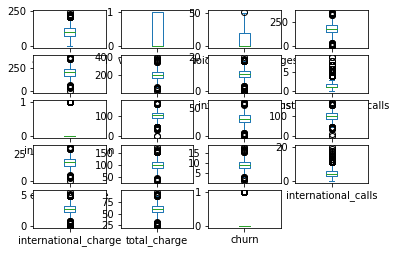

In [21]:
Telecom.plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False)
plt.show()

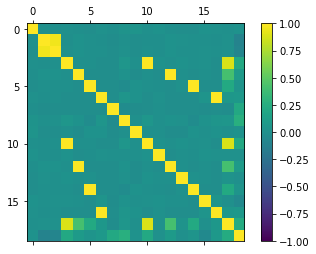

In [26]:
correlations = Telecom.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111) #"111" means "1x1 grid, first subplot" 
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()


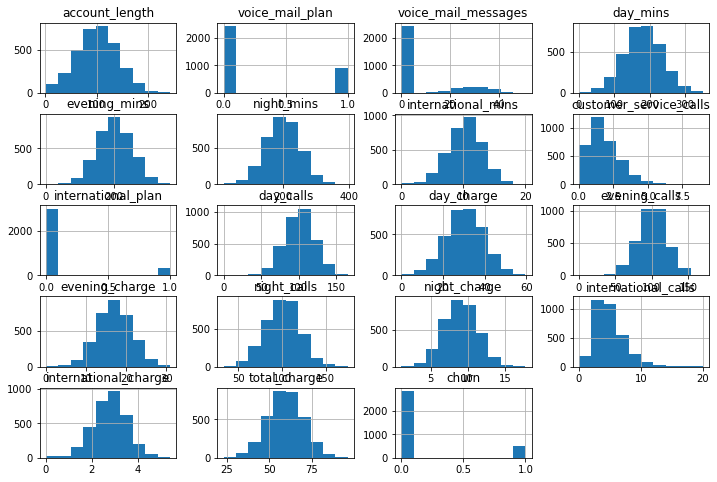

In [29]:
Telecom.hist(figsize=(12, 8))
plt.show()

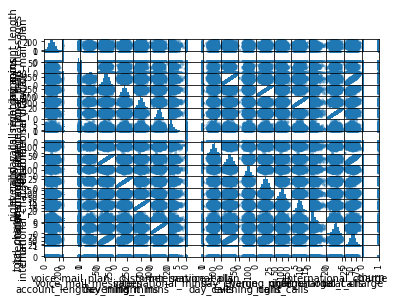

In [31]:
scatter_matrix(Telecom)
plt.show()

# Data rescaling

In [36]:
array = Telecom.values
# separate array into input and output components
X = array[:,0:17]
Y = array[:,18]

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)
print(rescaledX[0:7,:])

[[0.52479339 1.         0.49019608 0.75570125 0.54275502 0.5957504
  0.5        0.11111111 0.         0.66666667 0.75570087 0.58235294
  0.54286639 0.4084507  0.59593545 0.15       0.5       ]
 [0.43801653 1.         0.50980392 0.46066135 0.53753093 0.6218397
  0.685      0.11111111 0.         0.74545455 0.46059691 0.60588235
  0.53769007 0.49295775 0.62223551 0.15       0.68518519]
 [0.56198347 0.         0.         0.69384265 0.33324168 0.37493276
  0.61       0.         0.         0.69090909 0.69382964 0.64705882
  0.33322549 0.5        0.37537358 0.25       0.60925926]
 [0.34297521 0.         0.         0.85347777 0.17019522 0.46718666
  0.33       0.22222222 1.         0.43030303 0.85345406 0.51764706
  0.17017147 0.3943662  0.46742379 0.35       0.32962963]
 [0.30578512 0.         0.         0.47519954 0.40775364 0.44029048
  0.505      0.33333333 1.         0.68484848 0.47518444 0.71764706
  0.40795859 0.61971831 0.440526   0.15       0.50555556]
 [0.48347107 0.         0.      

# Data standardization

In [39]:
X = array[:,0:17]
Y = array[:,18]

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
print(rescaledX[0:7,:])

[[ 0.67648946  1.6170861   1.23488274  1.56676695 -0.07060962  0.86674322
  -0.08500823 -0.42793202 -0.32758048  0.47664315  1.56703625 -0.05594035
  -0.07042665 -0.46549436  0.86602851 -0.60119509 -0.0856905 ]
 [ 0.14906505  1.6170861   1.30794844 -0.33373776 -0.10808036  1.05857074
   1.24048169 -0.42793202 -0.32758048  1.12450284 -0.33401297  0.14486653
  -0.10754944  0.14782467  1.05938994 -0.60119509  1.2411686 ]
 [ 0.9025285  -0.61839626 -0.59175986  1.16830364 -1.57338336 -0.75686906
   0.70312091 -1.1882185  -0.32758048  0.67598459  1.168464    0.49627857
  -1.57389963  0.19893459 -0.75557074  0.21153386  0.69715637]
 [-0.42859027 -0.61839626 -0.59175986  2.19659605 -2.74286476 -0.07855114
  -1.30302599  0.33235445  3.05268496 -1.46693591  2.19675881 -0.60815927
  -2.7432675  -0.5677142  -0.07880574  1.02426282 -1.30640087]
 [-0.6546293  -0.61839626 -0.59175986 -0.24008971 -1.03893233 -0.27631146
  -0.04918418  1.09264093  3.05268496  0.62614923 -0.24004065  1.0986992
  -1.0379

# Feature engineering method1

In [47]:
array = Telecom.values
X = array[:,0:17]
Y = array[:,18]


# feature extraction
model = LogisticRegression(max_iter=500)


rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X, Y)

fit.n_features_
fit.support_
fit.ranking_

array([11,  1,  4,  5,  6,  8,  3,  1,  1,  9, 14, 12,  7, 13, 10,  2,  1])

# Feature engineering method2

In [50]:
array = Telecom.values
X = array[:,0:17]
Y = array[:,18]

# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)

print(model.feature_importances_)

[0.03651691 0.02109296 0.01597027 0.13210336 0.06122416 0.04148462
 0.04722031 0.12895492 0.07267701 0.03898541 0.12670589 0.03536042
 0.06062464 0.03646641 0.03946187 0.05556799 0.04958285]


# Model validation methods

In [52]:
array = Telecom.values
X = array[:,0:17]
Y = array[:,18]

test_size = 0.33
seed = 5
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)


result = model.score(X_test, Y_test)

result*100.0


86.9090909090909

In [54]:
array = Telecom.values
X = array[:,0:17]
Y = array[:,18]

num_folds = 10
seed = 7

kfold = KFold(n_splits=num_folds)
model = LogisticRegression(max_iter=500)

results = cross_val_score(model, X, Y, cv=kfold)

#Print results

results.mean()*100.0
results.std()*100.0


2.131615788872808

# Accuracy

In [55]:
array = Telecom.values
X = array[:,0:17]
Y = array[:,18]

kfold = KFold(n_splits=10)
model = LogisticRegression(max_iter=500)

scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)


results.mean()
results.std()

0.02131615788872808

In [58]:
array = Telecom.values
X = array[:,0:17]
Y = array[:,18]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)

#F1 score
matrix = f1_score(Y_test, predicted)
matrix

0.26540284360189575

# Model building

In [61]:
array = Telecom.values
X = array[:,0:17]
Y = array[:,18]

kfold = KFold(n_splits=10)

model = DecisionTreeClassifier(criterion='gini')

results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

model = DecisionTreeClassifier()
dt=model.fit(X,Y)

0.9159914405423388


In [63]:
kfold = KFold(n_splits=10)
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.8646859434284584


In [64]:
kfold = KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=17)

results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())


0.8784691877506248


In [65]:
kfold = KFold(n_splits=10)

model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.8562694430957905


In [66]:
num_trees = 10

kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.880879682077287


In [67]:
kfold = KFold(n_splits=10, random_state=None)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9489975004945064


In [68]:
X = array[:,0:17]
Y = array[:,18]
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.9540981100861341


In [70]:
kfold = KFold(n_splits=10)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.8754706802610995


# Comparing algorithms

In [71]:
models = []
models.append(('LR', LogisticRegression(max_iter=400)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10)
	cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.859867 (0.021954)
KNN: 0.877270 (0.023727)
CART: 0.916291 (0.015337)
NB: 0.864686 (0.014736)
SVM: 0.856269 (0.027343)


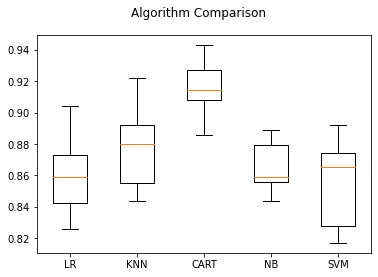

In [74]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()